# <span style="color:orange"> **PREDICTING OPERATING CONDITION OF WATER WELLS IN TANZANIA**</span>

 By: *Grace Rotich*

This is a machine learning project with models that predict the condition of water wells in Tanzania.

![introduction well](imageWell)



## BUSINESS UNDERSTANDING
According to Water.org(2024), Tanzania faces a significant water and sanitation crisis, out of its population of 65 million people, 58 million people (88% of the population) lack access to safe water. People living under these circumstances, particularly women and girls, spend a significant amount of time traveling long distances to collect water. And other challenges like underfunding of planned government projects, population growth, and extreme weather events due to climate change create challenges for those living in poverty. Now more than ever access to safe water at home is critical to families in Tanzania

The project's main goal is to create a model for forecasting operational conditions of water points in Tanzania. With accurate predictions showing whether a water point will be working, broken, or under repair, the Tanzanian government will improve maintenance decision-making procedures, thereby making sure that communities have sustainable access to drinking water.

These are what the government of Tanzania can achieve from this;

* It will be able to improve the lifespan of water wells operationally.
* It can ensure more communities have a dependable source of clean drinking water.
* It can be sure that public funds and resources work best by identifying which boreholes should be given the  first priority during maintenance based on their neediness levels.

### Problem Statement:


<img src="Problem.jpg" alt="child problem water" width="700" height="350">


In Tanzania, many water wells fall into disrepair due to inadequate maintenance and the lack of timely repairs. This project aims to build a data-driven model to predict the condition of water wells, thus enabling the government to prioritize and address maintenance needs efficiently.


### Objectives
The main goals of this project are:

1. To understand the data and the various factors that affect the condition of water wells in Tanzania.
2. To create a machine learning model that can reliably forecast the operational state of water wells Using past data.
3. To give advice on how to allocate funds and resources more effectively for water wells maintenance and repair.

### Metrices for success
Model Performance will be evaluated on the accuracy, precision and ROC and AUC of the predictive model.

## Data Sourcing

Using data from Taarifa (http://taarifa.org/) and the Tanzanian Ministry of Water(http://maji.go.tz/), to predict which pumps are functional, which need some repairs, and which don't work at all.

## DATA UNDERSTANDING

<img src="understanding.jpg" alt="Data Analysis" width="500" height="300">






Importing Libraries and data

In [54]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [55]:
# loading training set values
df1 = pd.read_csv("training_set_values.csv")
df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [56]:
#last 5
df1.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


The following is the set of information about the waterpoints in the data:

* amount_tsh - Total static head (amount water available to waterpoint)

* date_recorded - The date the row was entered

* funder - Who funded the well

* gps_height - Altitude of the well

* installer - Organization that installed the well

* longitude - GPS coordinate

* latitude - GPS coordinate

* wpt_name - Name of the waterpoint if there is one

* num_private -

* basin - Geographic water basin

* subvillage - Geographic location

* region - Geographic location

* region_code - Geographic location (coded)

* district_code - Geographic location (coded)

* lga - Geographic location

* ward - Geographic location

* population - Population around the well

* public_meeting - True/False

* recorded_by - Group entering this row of data

* scheme_management - Who operates the waterpoint

* scheme_name - Who operates the waterpoint

* permit - If the waterpoint is permitted

* construction_year - Year the waterpoint was constructed

* extraction_type - The kind of extraction the waterpoint uses

* extraction_type_group - The kind of extraction the waterpoint uses

* extraction_type_class - The kind of extraction the waterpoint uses

 * management - How the waterpoint is managed

* management_group - How the waterpoint is managed

* payment - What the water costs

* payment_type - What the water costs

* water_quality - The quality of the water

* quality_group - The quality of the water

* quantity - The quantity of water

* quantity_group - The quantity of water

* source - The source of the water

* source_type - The source of the water

* source_class - The source of the water

* waterpoint_type - The kind of waterpoint

* waterpoint_type_group - The kind of waterpoint





In [57]:
#Summary of the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

The dataset has null values on some of the features such as funder, installer, subvilage and public meeting. It also has a mixture of string and float datatypes so we need to convert the object data types to float for the regression model later.

In [58]:
#Dimentions of the data
df1.shape

(59400, 40)

In [59]:
# reading the data that shows the functionality status of the water pumps
df2 = pd.read_csv("training_set_lables.csv")
df2.head(10)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
5,9944,functional
6,19816,non functional
7,54551,non functional
8,53934,non functional
9,46144,functional


In [60]:
df2.tail(20)

,id,status_group
59380,30647,non functional
59381,67885,non functional
59382,47002,non functional
59383,44616,functional
59384,72148,non functional
59385,34473,functional
59386,34952,functional
59387,26640,functional
59388,72559,functional
59389,30410,functional


**Lables in this data sets**

The labels in this dataset are simple. There are three possible values:

* functional - the waterpoint is operational and there are no repairs needed

* functional needs repair - the waterpoint is operational, but needs repairs

* non functional - the waterpoint is not operational

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [62]:
#Joining the two datasets(df1 and df2), left join based on column id
df = df1.join(df2.set_index("id"), on = "id")

In [63]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [64]:
df.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [65]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

There are null values in some features although very little. There are object and integer data types. Relevant objects will be converted to categorical data.
The column num_private only contains 0 values and hence will be dropped.
The construction_year, amount_tsh and population column appears to have a big number of 0s

In [66]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


Below is a heatmap showing the correlation between the features in our joined data set.

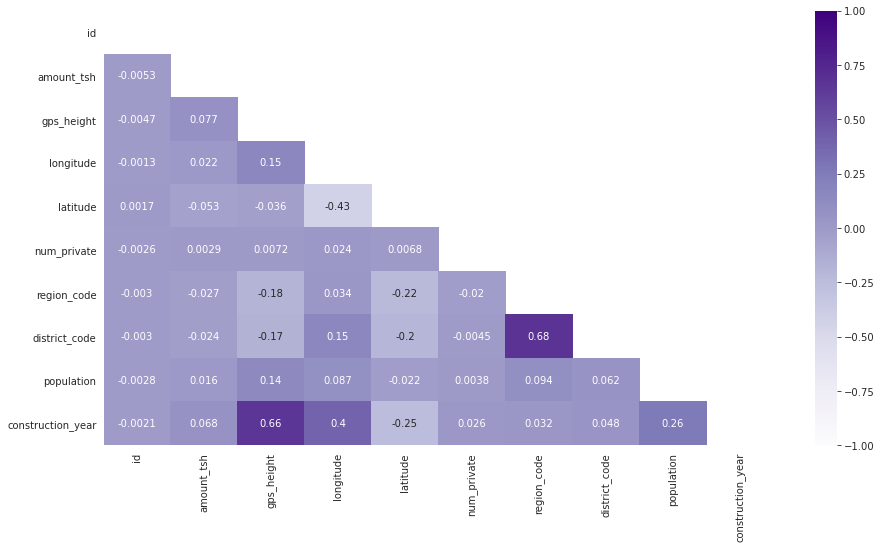

In [67]:
fig,ax  = plt.subplots(figsize=(15,8))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(data=df.corr(),center=0,vmin=-1,vmax=1,annot=True,mask=mask,cmap='Purples');

## DATA PREPARATION

The following features were chosento be used in the model.

In [68]:
tanz_df = df.loc[:, ['amount_tsh', 'gps_height', 'funder', 'installer', 'population', 'longitude',
                 'latitude','date_recorded', 'construction_year','basin', 'region', 
                   'scheme_management', 'extraction_type_class',
                  'payment', 'water_quality', 'quantity', 'source_type', 'waterpoint_type_group', 'status_group']]

tanz_df.head(10)

,amount_tsh,gps_height,funder,installer,population,longitude,latitude,date_recorded,construction_year,basin,region,scheme_management,extraction_type_class,payment,water_quality,quantity,source_type,waterpoint_type_group,status_group
0,6000.0,1390,Roman,Roman,109,34.938093,-9.856322,2011-03-14,1999,Lake Nyasa,Iringa,VWC,gravity,pay annually,soft,enough,spring,communal standpipe,functional
1,0.0,1399,Grumeti,GRUMETI,280,34.698766,-2.147466,2013-03-06,2010,Lake Victoria,Mara,Other,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,686,Lottery Club,World vision,250,37.460664,-3.821329,2013-02-25,2009,Pangani,Manyara,VWC,gravity,pay per bucket,soft,enough,dam,communal standpipe,functional
3,0.0,263,Unicef,UNICEF,58,38.486161,-11.155298,2013-01-28,1986,Ruvuma / Southern Coast,Mtwara,VWC,submersible,never pay,soft,dry,borehole,communal standpipe,non functional
4,0.0,0,Action In A,Artisan,0,31.130847,-1.825359,2011-07-13,0,Lake Victoria,Kagera,NaN,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional
5,20.0,0,Mkinga Distric Coun,DWE,1,39.172796,-4.765587,2011-03-13,2009,Pangani,Tanga,VWC,submersible,pay per bucket,salty,enough,other,communal standpipe,functional
6,0.0,0,Dwsp,DWSP,0,33.362410,-3.766365,2012-10-01,0,Internal,Shinyanga,VWC,handpump,never pay,soft,enough,borehole,hand pump,non functional
7,0.0,0,Rwssp,DWE,0,32.620617,-4.226198,2012-10-09,0,Lake Tanganyika,Shinyanga,NaN,handpump,unknown,milky,enough,shallow well,hand pump,non functional
8,0.0,0,Wateraid,Water Aid,0,32.711100,-5.146712,2012-11-03,0,Lake Tanganyika,Tabora,VWC,handpump,never pay,salty,seasonal,borehole,hand pump,non functional
9,0.0,0,Isingiro Ho,Artisan,0,30.626991,-1.257051,2011-08-03,0,Lake Victoria,Kagera,NaN,handpump,never pay,soft,enough,shallow well,hand pump,functional


In [69]:
tanz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   gps_height             59400 non-null  int64  
 2   funder                 55765 non-null  object 
 3   installer              55745 non-null  object 
 4   population             59400 non-null  int64  
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   date_recorded          59400 non-null  object 
 8   construction_year      59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  region                 59400 non-null  object 
 11  scheme_management      55523 non-null  object 
 12  extraction_type_class  59400 non-null  object 
 13  payment                59400 non-null  object 
 14  water_quality          59400 non-null  object 
 15  qu

Separating numerical columns (int or float) and categorical columns().

In [70]:
#categorical columns
categorical_cols = tanz_df.select_dtypes(include='object').columns
categorical_cols

Index(['funder', 'installer', 'date_recorded', 'basin', 'region',
       'scheme_management', 'extraction_type_class', 'payment',
       'water_quality', 'quantity', 'source_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [71]:
#numerical columns
numerical_cols = tanz_df.select_dtypes(include='number').columns
numerical_cols

Index(['amount_tsh', 'gps_height', 'population', 'longitude', 'latitude',
       'construction_year'],
      dtype='object')

## DATA CLEANING

This will involve removing missing values, replacing missing values and duplicates, correcting wrong data types and handling outliers and anomalies.

In [72]:
#Lets check for the number of duplicates
tanz_df.duplicated().sum()

688

As shown we have 688 values duplicated

In [73]:
#dropping duplicates
tanz_df.drop_duplicates(inplace = True)
tanz_df.duplicated().sum()

0

The function below will look for missing values and show the percentage.

In [74]:
def missing_values(data):
    
    miss_val = data.isna().sum().sort_values(ascending = False)
    percentage = (data.isna().sum() / len(data)).sort_values(ascending = False)
    missing_values = pd.DataFrame({"Missing Values": miss_val, "In Percentage": percentage})
    missing_values.drop(missing_values[missing_values["In Percentage"] == 0].index, inplace=True)
    return missing_values
missing_values(tanz_df)

,Missing Values,In Percentage
scheme_management,3854,0.065642
installer,3653,0.062219
funder,3633,0.061878


The percentage of missing values are small, hence we can drop them without it affecting the model.

In [75]:
#Dropping missing values
tanz_df=tanz_df.dropna()
tanz_df.head(10)

,amount_tsh,gps_height,funder,installer,population,longitude,latitude,date_recorded,construction_year,basin,region,scheme_management,extraction_type_class,payment,water_quality,quantity,source_type,waterpoint_type_group,status_group
0,6000.0,1390,Roman,Roman,109,34.938093,-9.856322,2011-03-14,1999,Lake Nyasa,Iringa,VWC,gravity,pay annually,soft,enough,spring,communal standpipe,functional
1,0.0,1399,Grumeti,GRUMETI,280,34.698766,-2.147466,2013-03-06,2010,Lake Victoria,Mara,Other,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,686,Lottery Club,World vision,250,37.460664,-3.821329,2013-02-25,2009,Pangani,Manyara,VWC,gravity,pay per bucket,soft,enough,dam,communal standpipe,functional
3,0.0,263,Unicef,UNICEF,58,38.486161,-11.155298,2013-01-28,1986,Ruvuma / Southern Coast,Mtwara,VWC,submersible,never pay,soft,dry,borehole,communal standpipe,non functional
5,20.0,0,Mkinga Distric Coun,DWE,1,39.172796,-4.765587,2011-03-13,2009,Pangani,Tanga,VWC,submersible,pay per bucket,salty,enough,other,communal standpipe,functional
6,0.0,0,Dwsp,DWSP,0,33.362410,-3.766365,2012-10-01,0,Internal,Shinyanga,VWC,handpump,never pay,soft,enough,borehole,hand pump,non functional
8,0.0,0,Wateraid,Water Aid,0,32.711100,-5.146712,2012-11-03,0,Lake Tanganyika,Tabora,VWC,handpump,never pay,salty,seasonal,borehole,hand pump,non functional
10,0.0,62,Private,Private,345,39.209518,-7.034139,2011-02-20,2011,Wami / Ruvu,Pwani,Private operator,submersible,never pay,salty,enough,borehole,other,functional
11,200.0,1062,Danida,DANIDA,250,35.770258,-10.574175,2013-02-18,1987,Lake Nyasa,Ruvuma,WUG,handpump,pay when scheme fails,soft,insufficient,shallow well,hand pump,functional
12,0.0,0,World Vision,World vision,0,33.798106,-3.290194,2012-10-14,0,Internal,Shinyanga,WUG,handpump,other,soft,enough,shallow well,hand pump,functional


Checking for outliers in some of the features

In [76]:
#Function to check outliers
sns.set_style("whitegrid")

def box_plot(data, column, hue=None):
    '''
    This Function plots a box plot with parameters for the data frame and the column
    '''
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=column, data=data, hue=hue)
    plt.title(f"{column} outliers")
    plt.show()

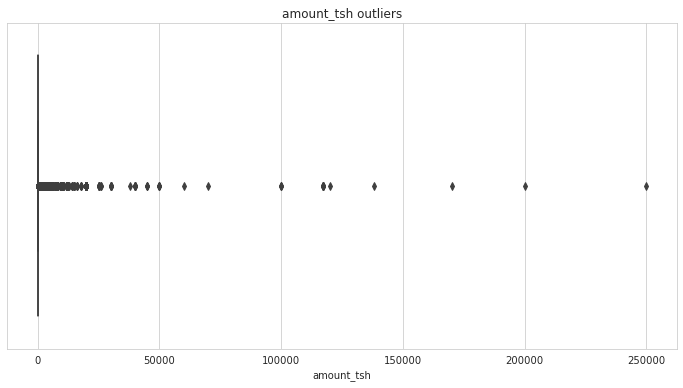

In [77]:
box_plot(tanz_df, 'amount_tsh')

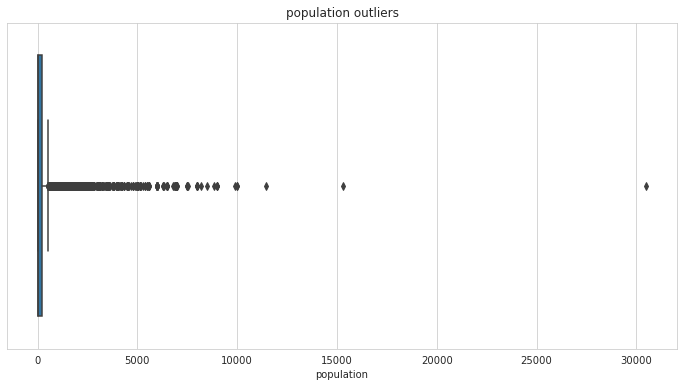

In [78]:
box_plot(tanz_df, 'population')

lets correct the data types in our dataframe

In [79]:
#This for loop changes the datatype string to a category
for i in categorical_cols:
    tanz_df[i] = tanz_df[i].astype('category')

In [80]:
tanz_df.describe()

,amount_tsh,gps_height,population,longitude,latitude,construction_year
count,51217.000000,51217.000000,51217.000000,51217.000000,5.121700e+04,51217.000000
mean,349.372799,708.914052,182.980905,34.507423,-5.706283e+00,1360.472011
std,2820.438023,696.674407,479.993076,5.552392,2.877913e+00,930.603746
min,0.000000,-90.000000,0.000000,0.000000,-1.164944e+01,0.000000
25%,0.000000,0.000000,0.000000,33.151330,-8.223294e+00,0.000000
50%,0.000000,490.000000,40.000000,35.152189,-4.996336e+00,1988.000000
75%,35.000000,1341.000000,217.000000,37.353301,-3.326436e+00,2005.000000
max,250000.000000,2770.000000,30500.000000,40.323402,-2.000000e-08,2013.000000


## EXPLORATORY DATA ANALYSIS (EDA)

![EDA image](Analysis.jpg)

### Univariate Analysis



#### Categorical features

status_group column is our target variable.
Below is a percentage distribution for the column.

Text(0.5, 1.0, 'Percentage of Water Points by Status Group')

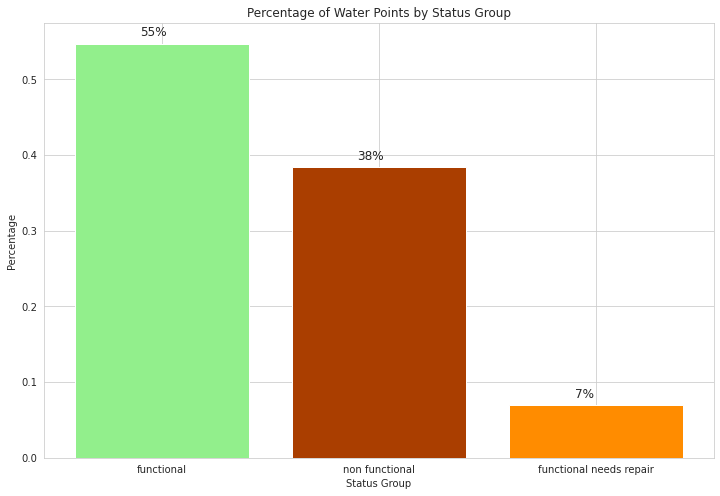

In [81]:
# Define the colors for the bars
colors = ['#92ef8c', '#aa3e00', '#ff8c00']

# Calculate the value counts of the 'status_group' column as a percentage
counts = tanz_df['status_group'].value_counts(normalize=True)

# Create the bar graph
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(counts.index, counts.values, color=colors)

# Add the percentage values to the top of each bar
for i, v in enumerate(counts):
    ax.text(i-0.1, v+0.01, f"{v:.0%}", fontsize=12)
    
# Set the axis labels and title
ax.set_xlabel('Status Group')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Water Points by Status Group')

From the above bargraph visulaization we can tell that 55% of the boreholes are functional, 38% of them are non functional and 7% need repair.

In [82]:
# Function to display count plots of the selected column
def count_plot(data, column, hue=None, palette=None):
    plt.figure(figsize=(12,6))
    sns.countplot(x=column, data=data, hue=hue, order=data[column].value_counts().index, palette="tab20")
    plt.title(f"{column} count plot")
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

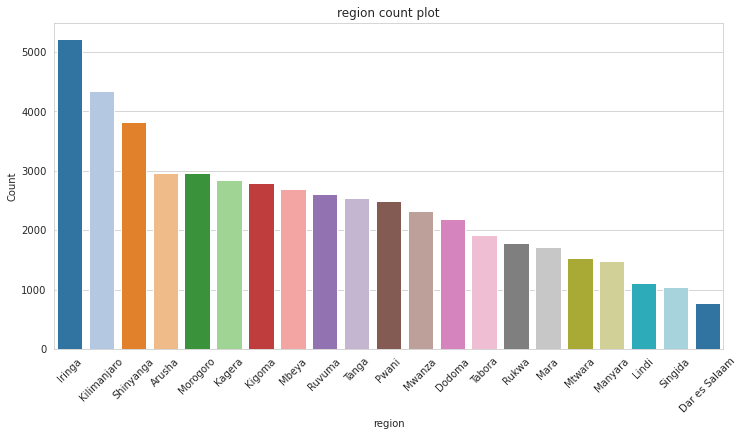

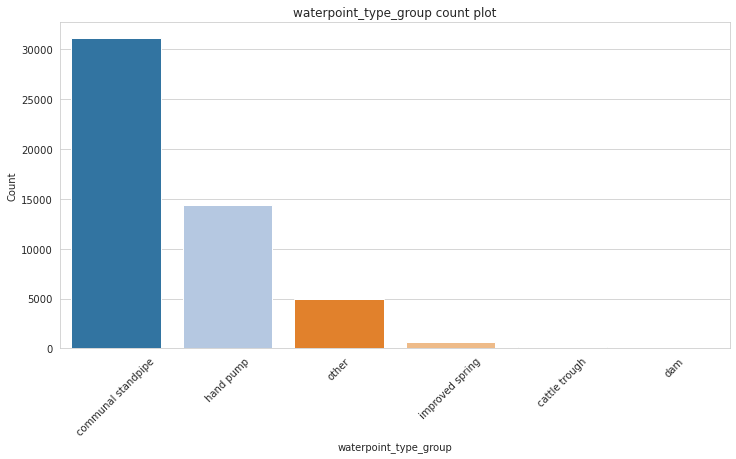

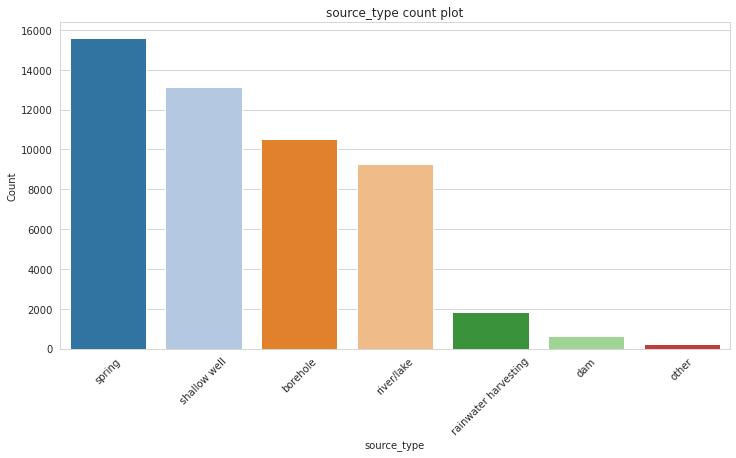

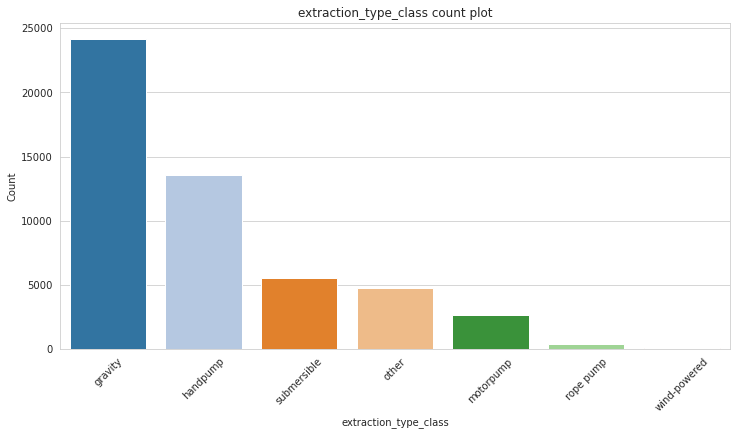

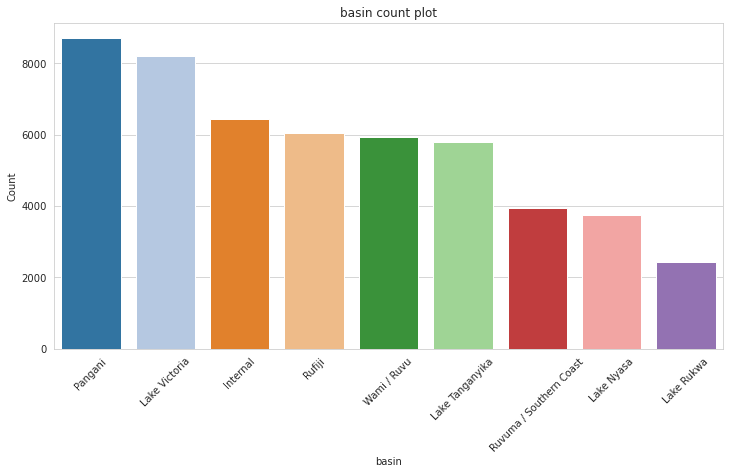

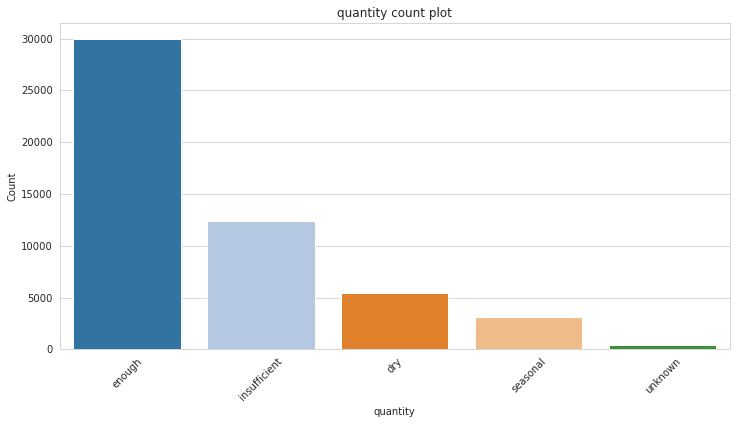

In [83]:
count_plot(tanz_df, 'region')
count_plot(tanz_df, 'waterpoint_type_group')
count_plot(tanz_df, 'source_type')
count_plot(tanz_df, 'extraction_type_class')
count_plot(tanz_df, 'basin')
count_plot(tanz_df, 'quantity')


From the above it is evident that:

55% of waterpoints are functional, 38% are non-functional, 7% are functional and need repair

The highest number of waterpoints have enough water, then the rest have insufficient, dry, seasonal and unknown quantities respectively.

Most waterpoints draw their water from Pangani basin followed by Lake Victoria basin.

Most waterpoints use pumps that extract water gravity wise, handpumps come as a close second while the wind 
powered pumps are the least popular. The gravity water pumps may hint at the geographical layout of the land and hand pumps may indicate they are cost-efficienct

springs are most common source of water for waterpoints, followed by shallow wells, boreholes,rivers/lakes, rainwater harvesting, dams and others respectively

The most common kinds of waterpoints are communal standpipes. Handpump kind of waterpoints are also common.

Iringa, Kilimanjaro, Shinyanga, Arusha and Morogoro are the top 5 regions with the most waterpoints

#### numerical features
Below is a function that displays a histogram when it takes in a feature from a DataFrame

In [84]:
def hist_plot(data,column):
    fig,ax=plt.subplots(figsize=(12,8))
    plt.hist(data=data, x=column, color="Turquoise")
    plt.title(f"Distribution of {column}")
    mn=round(data[column].mean(),2)
    ax.axvline(x=mn,label=(f'mean:{mn}'),color='orange')
    plt.xlabel(f'{column}')
    plt.ylabel('frequency')
    plt.legend()
    plt.show()

Histogram for population, it is positively skewed

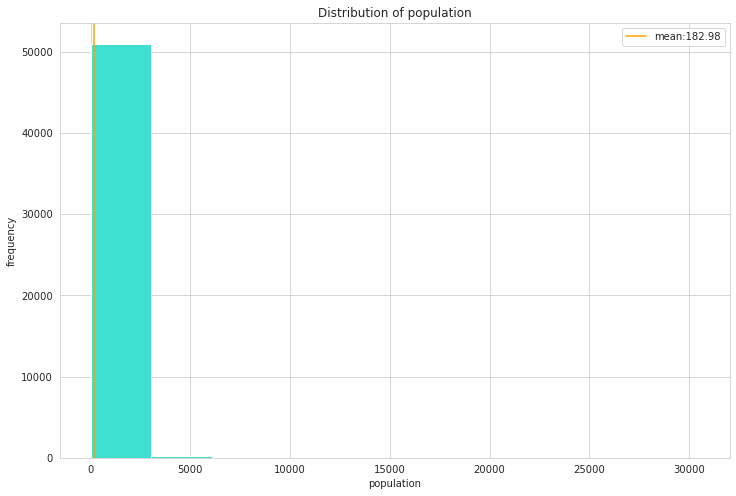

In [85]:

hist_plot(tanz_df, 'population')

Histogram for gps_height column, and as seen, it is positively skewed.

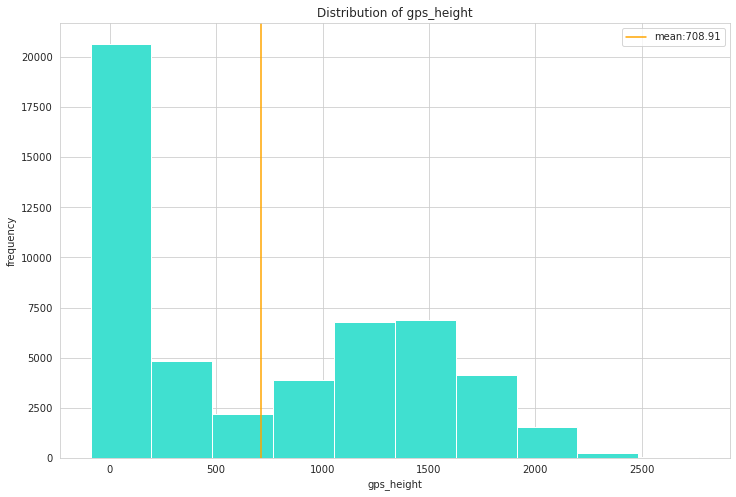

In [86]:
hist_plot(tanz_df, 'gps_height')

Histogram for Distribution, it is positively skewed.

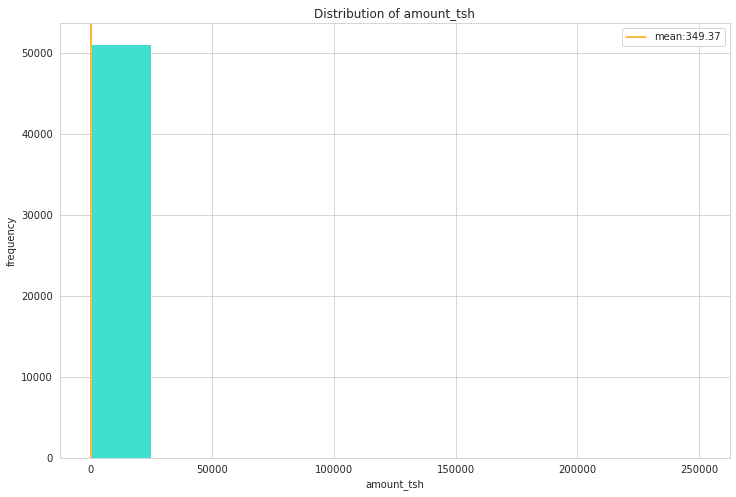

In [87]:
hist_plot(tanz_df, 'amount_tsh')

#### Bivariate Analysis

The bivariate analysis was conducted to examine the relationship between the independent variables and the dependent variable in this case the status_group feature.

Status_group vs quantity


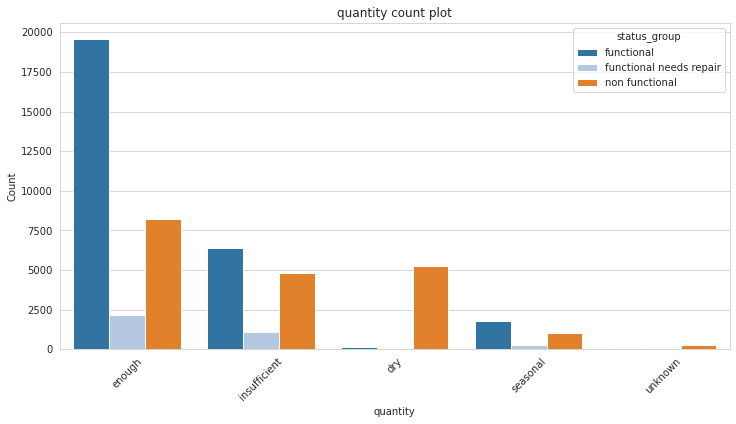

In [88]:
count_plot(data=tanz_df,column='quantity',hue='status_group')

Water points with enough water are the most functional with a relatively small number of non functional pumps.

status_group vs water_quality

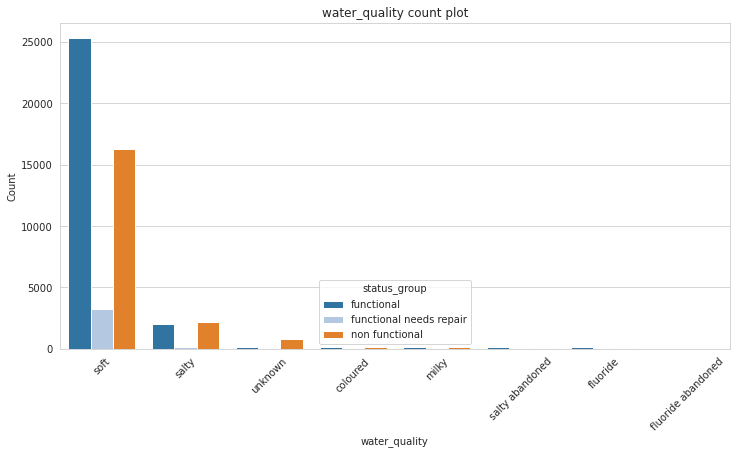

In [91]:
count_plot(data=tanz_df,column='water_quality',hue='status_group')

As shown, most functional waterpoints or pumps are those with soft water

status_group vs region

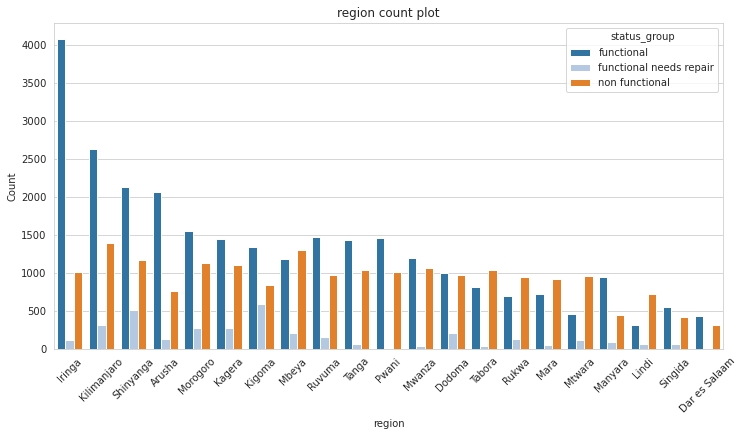

In [92]:
count_plot(tanz_df,'region','status_group')

Iringa, Kilimajaro and Shimyanga are the regions with the most functional waterpoints. However, Kilimajaro and Mbeys have the highest non-functional wells.


Status_group vs source_type

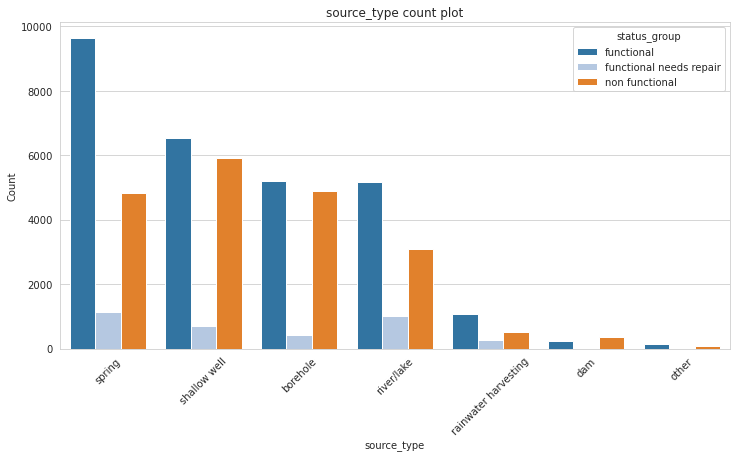

In [93]:
count_plot(tanz_df, "source_type", "status_group")

Water from springs and shallow wells have the highest number of functional pumps. Water from Springs and river/lake have the highest number of functional pumps that need repair. Water from Shallow wells and boreholes have the highest number of non functional wells

### FEATURE ENGINEERING